In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## About the data set:

These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.

For each dataset, the fields are:

A row number (1-n) useful in sorting this export's results
The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results
The date in yyyy-mm-dd format
The local time of day in hh:mm:ss 24-hour format
The numeric data, if any (may be an empty string)
The text data, if any (may be an empty string)

The units of each dataset are:

--Solar radiation: watts per meter^2

--Temperature: degrees Fahrenheit

--Humidity: percent

--Barometric pressure: Hg

--Wind direction: degrees

--Wind speed: miles per hour

--Sunrise/sunset: Hawaii time

# Explore the data to gain insights

In [2]:
#Loading the data into a pandas data frame

Data = pd.read_csv("SolarPrediction.csv")
Data = Data.sort_values(['UNIXTime'], ascending = [True])
Data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


Note that the 'Temperature' column is in degrees Fahrenheit. We decided to transform it in Celsius

In [3]:
def celsius(F):
    return (F-32)/1.8


Temp_c = [celsius(F) for F in Data['Temperature'].values] #List of Celsius Values
Temp_c_df = pd.DataFrame({'Temperature_c': Temp_c}) # Creating a data frame

#Data = Data.join(Temp_c_df) # Merging both data frames

#Data = Data.drop(['Temperature'],axis = 1) # Dropping Fahrenheit values

for x,y in enumerate(Temp_c):
    Data['Temperature'].values[x] = y  #All at once, but don't run that cell more than one time... 
    
    

Data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,10,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,10,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,10,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,10,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,10,30.43,103,67.42,11.25,06:07:00,18:38:00


In [4]:
#Checking the data-type of the columns and if we have missing entries

Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32686 entries, 7416 to 24522
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.5+ MB


The most precise approach would be to make a model based on the given dava of time, date, unixtime, etc... But as we know, the others attributes are dependents of those (e.g. temp has a dependence on season), so to simplify our analysis we will just drop those attributes and try to find key features to create our model


So all the 'object' columns is not important neither is 'UNIXTime', let's drop them

*** Probably is a good idea to make an future analysis also based on time, maybe reasulting in a richer model or at least a richer visualization *** 

In [5]:
Data = Data.drop([
    'UNIXTime',
    'Data',
    'Time',
    'TimeSunRise',
    'TimeSunSet'],
    axis = 1) 

In [6]:
#Using the describe() method to gain some fast insights about the data

Data.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,10.166065,30.422879,75.016307,143.489821,6.243869
std,315.916387,3.458138,0.054673,25.990219,83.167500,3.490474
min,1.110000,1.000000,30.190000,8.000000,0.090000,0.000000
25%,1.230000,7.000000,30.400000,56.000000,82.227500,3.370000
50%,2.660000,10.000000,30.430000,85.000000,147.700000,5.620000
75%,354.235000,12.000000,30.460000,97.000000,179.310000,7.870000
max,1601.260000,21.000000,30.560000,103.000000,359.950000,40.500000


The first thing we have to have in mind is what we wanna do. Our goal in that project is to predict the level of solar radiation.

We can see that all entries are 'non-null' wich will make our work easier.

We can also see that the standard deviation of 'Pressure' is pretty low and the standard deviation of 'Radiation' is the greater of all features. So, if Pressure is almost constant while Radiation has a high standard deviation, we can assume that pressure is not an important feature to our goal.

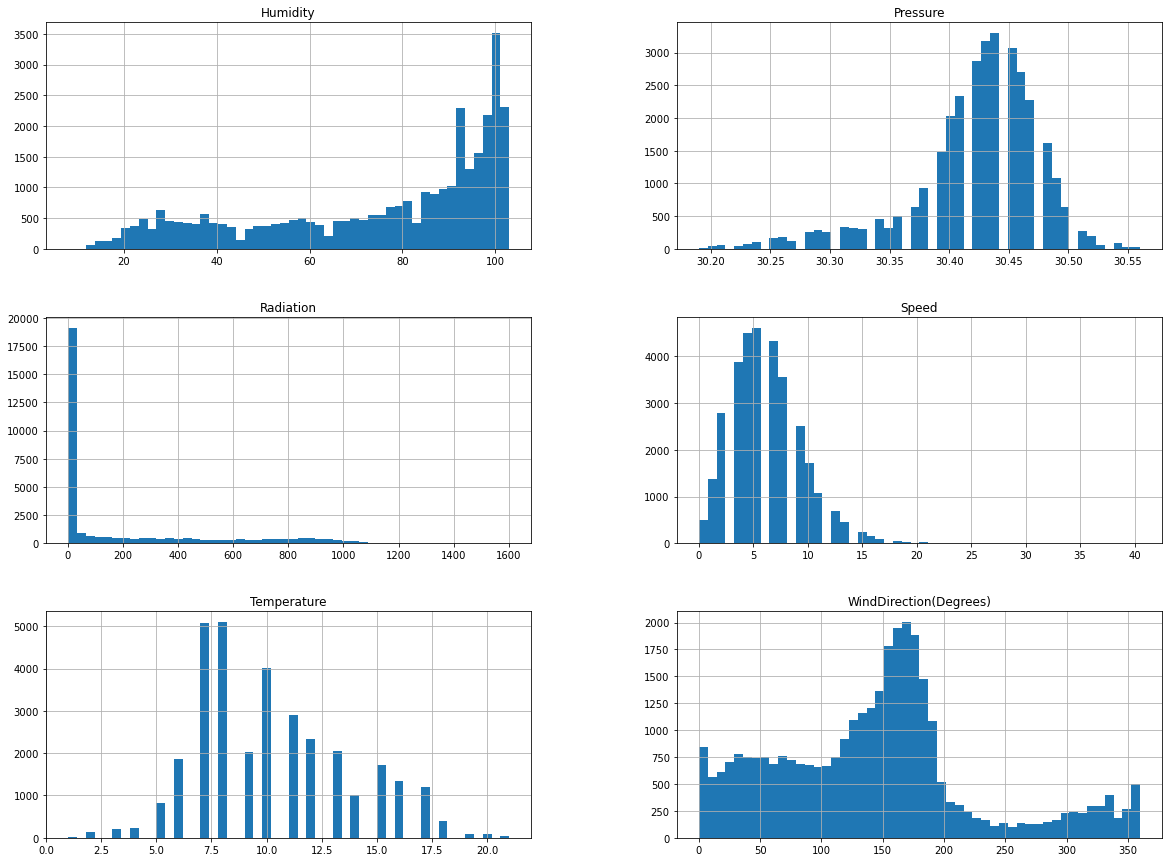

In [7]:
#Plotting a histogram of each numerical feature in order to gain more insights

Data.hist(bins=50, figsize=(20,15))
plt.show()

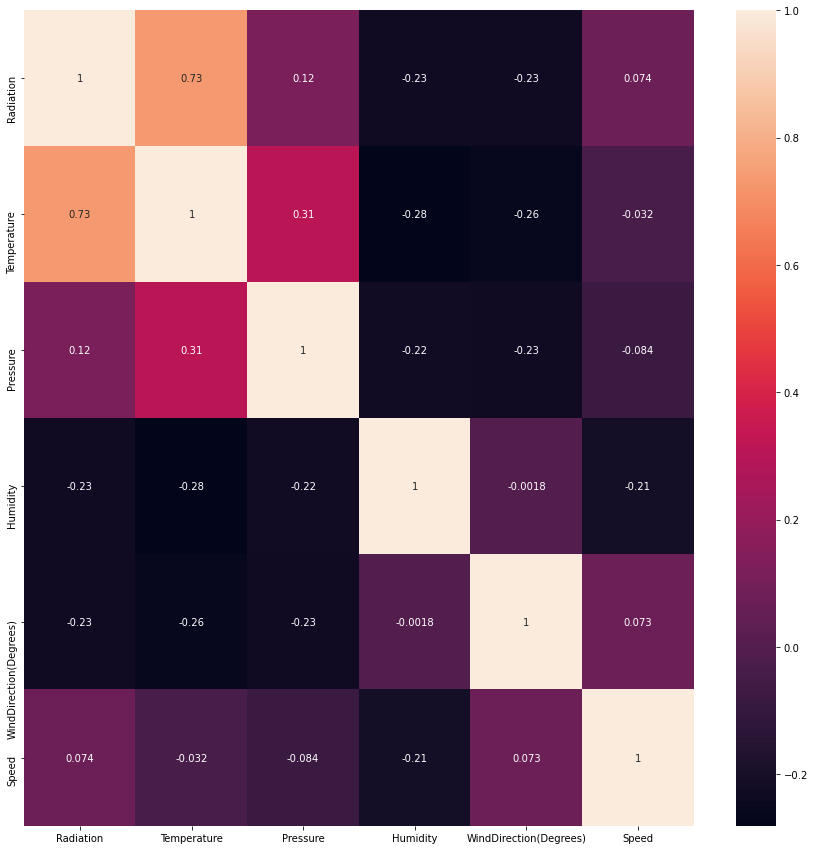

In [8]:
#Creating a correlation heatmap using seaborn

cor = Data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True)

With that correlation heatmap it's easier to see wich feature is most important for the model we want to create.

As you can see the highest correlation (magnitude) with Radiation is 'Temperature' (pos. correlated, 0.73), followed by 'Humidity' and 'WindDirection' (both neg. correlated, -0.23)

Let's plot those attributes

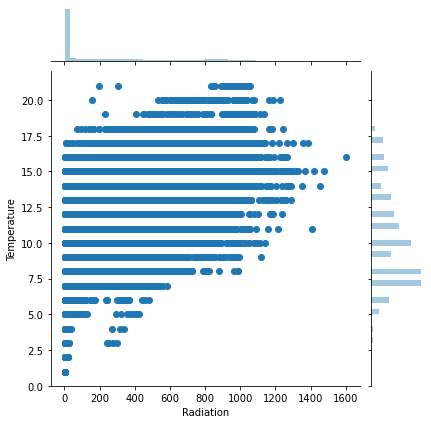

In [9]:
sns.jointplot(x="Radiation", y="Temperature", data=Data)

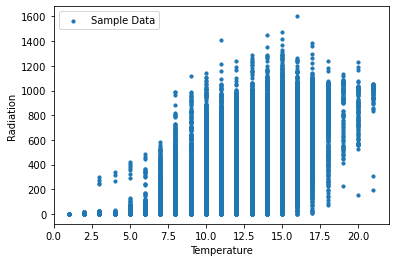

In [10]:
plt.scatter(Data['Temperature'].values, Data['Radiation'].values, label='Sample Data', s=10)
plt.xlabel('Temperature')
plt.ylabel('Radiation')
plt.legend()
plt.show()

# Creating a test set    (testando, jaja comento) 

In [11]:


Data["Temp"] = pd.cut(Data["Temperature"],
                               bins=[0,2.5,5.,7.5,10.,12.5,15.,17.5,20., np.inf],
                               labels=[0,2.5,5.,7.5,10.,12.5,15.,17.5,20.])

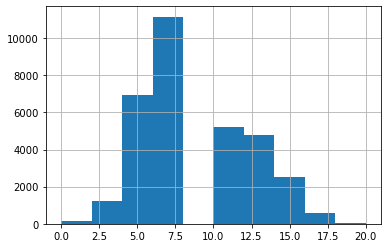

In [12]:
Data['Temp'].hist()

In [13]:
#Using the stratifiedshufflesplit 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Data, Data['Temp']):
    strat_train_set = Data.loc[train_index]
    strat_test_set = Data.loc[test_index] 

In [14]:
strat_test_set["Temp"].value_counts() / len(strat_test_set) 

7.5     0.342154
5.0     0.213368
10.0    0.160141
12.5    0.147905
15.0    0.077853
2.5     0.037167
17.5    0.015907
0.0     0.004283
20.0    0.001224
Name: Temp, dtype: float64